In [1]:
import numpy as np
import pandas as pd

# AI/ML for Cybersecurity project (Phase 1: Data Preprocessing and Feature Engineering)
## Group 6
 This project aims at using the Phishing Corpus dataset from UCI to build classification models that can detect phishing websites. In phase 1 of the project, the dataset acquired from the UCI ML repository will be evaluated and preprocessed with the following objectives:
- understanding the dataset
- Cleaning the dataset by handling missing or erroneous values
- Engineer features from URL and webcontent
- Creating additional features based on heuristics to improve detection

In [2]:
#importing dataset
data = pd.read_csv("Phishing_URL_Dataset.csv")

In [3]:
#first look at the data
data.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Domain_contains_number,Title_contains_number,Title_contains_specialcharacter,Title_nonalphanumeric_count,url_uppercase_ratio,title_uppercase_ratio,external_to_internal_ref_ratio,image_to_text_ratio,is_shortened_url,tag_to_code_ratio
0,mw42508.txt,http://www.teramill.com,22,www.teramill.com,16,0,com,82.644628,1.00,0.522907,...,0,1,0,0,0,0,1.000000,0.000000,0,0.000000
1,7972389.txt,https://service-mitld.firebaseapp.com/,37,service-mitld.firebaseapp.com,29,0,com,64.645264,0.48,0.522907,...,0,1,0,0,0,0,0.000000,0.000000,0,0.000000
2,62523.txt,https://www.vysor.io,19,www.vysor.io,12,0,io,100.000000,1.00,0.012927,...,0,0,0,0,0,0,0.500000,0.013043,0,0.065217
3,386777.txt,https://www.ainewsletter.com,27,www.ainewsletter.com,20,0,com,100.000000,1.00,0.522907,...,0,0,0,0,0,0,0.954545,0.003067,0,0.009202
4,527611.txt,https://www.sweatdrop.com,24,www.sweatdrop.com,17,0,com,100.000000,1.00,0.522907,...,0,0,0,0,0,0,0.300000,0.076159,0,0.096026


In [4]:
data.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

In [5]:
#evaluating a few instances
pd.set_option('display.max_rows', None)
data[0:10].T

,0,1,2,3,4,5,6,7,8,9
FILENAME,mw42508.txt,7972389.txt,62523.txt,386777.txt,527611.txt,mw1796.txt,mw27703.txt,145087.txt,mw63002.txt,74410.txt
URL,http://www.teramill.com,https://service-mitld.firebaseapp.com/,https://www.vysor.io,https://www.ainewsletter.com,https://www.sweatdrop.com,http://www.komaru.today,http://www.nextraload.com,https://www.klerk.ru,http://www.hesselawchambers.com,https://www.coraevans.com
URLLength,22,37,19,27,24,22,24,19,30,24
Domain,www.teramill.com,service-mitld.firebaseapp.com,www.vysor.io,www.ainewsletter.com,www.sweatdrop.com,www.komaru.today,www.nextraload.com,www.klerk.ru,www.hesselawchambers.com,www.coraevans.com
DomainLength,16,29,12,20,17,16,18,12,24,17
IsDomainIP,0,0,0,0,0,0,0,0,0,0
TLD,com,com,io,com,com,today,com,ru,com,com
URLSimilarityIndex,82.644628,64.645264,100.0,100.0,100.0,65.84022,72.108844,100.0,62.825485,100.0
CharContinuationRate,1.0,0.48,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
TLDLegitimateProb,0.522907,0.522907,0.012927,0.522907,0.522907,0.00016,0.522907,0.018013,0.522907,0.522907


In [6]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
FILENAME,75650,75650,mw42508.txt,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
URL,75650,75605,http://ravinjeur.cloudaccess.host/index.html,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
URLLength,75650.0,NaN,NaN,NaN,26.328962,5.860283,14.0,22.0,25.0,29.0,67.0
Domain,75650,74864,sites.google.com,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DomainLength,75650.0,NaN,NaN,NaN,19.180608,5.199939,8.0,15.0,19.0,22.0,48.0
IsDomainIP,75650.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TLD,75650,410,com,42358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
URLSimilarityIndex,75650.0,NaN,NaN,NaN,89.207634,17.466607,15.126574,78.271605,100.0,100.0,100.0
CharContinuationRate,75650.0,NaN,NaN,NaN,0.966719,0.110988,0.0,1.0,1.0,1.0,1.0
TLDLegitimateProb,75650.0,NaN,NaN,NaN,0.305715,0.245965,0.0,0.014148,0.522907,0.522907,0.522907


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75650 entries, 0 to 75649
Data columns (total 68 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   FILENAME                         75650 non-null  object 
 1   URL                              75650 non-null  object 
 2   URLLength                        75650 non-null  int64  
 3   Domain                           75650 non-null  object 
 4   DomainLength                     75650 non-null  int64  
 5   IsDomainIP                       75650 non-null  int64  
 6   TLD                              75650 non-null  object 
 7   URLSimilarityIndex               75650 non-null  float64
 8   CharContinuationRate             75650 non-null  float64
 9   TLDLegitimateProb                75650 non-null  float64
 10  URLCharProb                      75650 non-null  float64
 11  TLDLength                        75650 non-null  int64  
 12  NoOfSubDomain     

In [8]:
data.shape

(75650, 68)


After exploring the dataset, the following key insights have been acquired:
- the dataset has 235795 rows and 56 columns
- Only 5 features are Non-numeric with the remaining being binary or continuous values
- The mean of the labels is about 0.57 (indicating 57% for class 1 and 43% for class 0), showing reasonable class balance.
- The dataset does not seem to have any missing values, however there does seem to be some missing titles that are not properly labeled as having titles in the 'HasTitle' feature.
- Some features need to be adjusted for outliers becuase of very high maximum values compared to their average, such as 'LargestLineLength' and 'LineofCode'.
- A healthy humber of features exist describing the URL of a phishing website, such as URL length, number of special characters in URL, number of equal signs, and many more. However, not many features are present describing the Domain and Title of the website.

In [9]:
#handling erroneous values at 'HasTitle' column
data.loc[data['Title'] == '0', 'HasTitle'] = 0
data.loc[data['Title'] != '0', 'HasTitle'] = 1

## Feature engineering and creating additional features

Feature engineering is the process of transforming raw data into meaningful features that enhance the performance of machine learning models. Furthermore, more features could be created using heuristics and additional calculations.

In [10]:
#New features for domain beggining, special characters ratio, and numbers
special_chars = ['-', '_', '.', '@']
data['Domain_starts_with_www.'] = data['Domain'].str.startswith('www.').astype(int)
data['special_char_in_domain_ratio'] = data['Domain'].apply(lambda x: sum(1 for c in x if c in special_chars) / len(x) if len(x) > 0 else 0)
data['Domain_contains_number'] = data['Domain'].str.contains(r'\d').astype(int)

In [11]:
#New features for titles containing number and special characters
data['Title_contains_number'] = data['Title'].str.contains(r'\d').astype(int)
data['Title_contains_specialcharacter'] = data['Title'].str.contains(r'[^a-zA-Z0-9]').astype(int)

In [12]:
import re
data['Title_nonalphanumeric_count'] = data['Title'].apply(lambda x: len(re.findall(r'[^\w]', x, flags=re.UNICODE)))

In [13]:
#New feature for uppercase to lowercase ratio
data['url_uppercase_ratio'] = data['URL'].apply(lambda x: sum(1 for c in x if c.isupper()) / len(x) if len(x) > 0 else 0)
data['title_uppercase_ratio'] = data['Title'].apply(lambda x: sum(1 for c in str(x) if c.isupper()) / len(str(x)) if len(str(x)) > 0 else 0)

In [14]:
#New feature for external to internal references ratio
data['external_to_internal_ref_ratio'] = data['NoOfExternalRef'] / (data['NoOfSelfRef'] + 1)

In [15]:
#New feature for image to text ratio
data['image_to_text_ratio'] = data['NoOfImage'] / (data['LineOfCode'] + 1)

In [16]:
#New features to check for shortened URLs
shortening_services = ['bit.ly', 'tinyurl', 'goo.gl', 't.co', 'ow.ly', 'is.gd']
data['is_shortened_url'] = data['Domain'].apply(lambda x: 1 if any(service in x for service in shortening_services) else 0)

In [17]:
#New features for HTML tag to code ratio
data['tag_to_code_ratio'] = (data['NoOfImage'] + data['NoOfCSS'] + data['NoOfJS']) / (data['LineOfCode'] + 1)

### Newly Added Features and Justifications

New features have been engineered to help in detecting phishing websites. These features were chosen based on the characteristics of phishing websites commonly identified in academic research.

- **Domain_starts_with_www.**: This feature identifies if the domain starts with "www." Legitimate websites typically adhere to conventional URL structures, and deviations from this format may indicate phishing behavior. Phishing websites might skip this prefix to create ambiguity or seem unconventional [1].

- **special_char_in_domain_ratio**: The ratio of special characters (such as `-`, `_`, `.`, `@`) present in the domain name is calculated. These characters are often used by phishing websites to mimic legitimate domains or to obscure the actual intent of the website. Phishing sites that heavily rely on special characters can be flagged as suspicious [2].

- **Domain_contains_number**: This feature checks if numeric characters are present in the domain. Phishing websites often include numbers in their domain names to impersonate legitimate websites or bypass filters. Numbers in domain names are a common feature in phishing attempts [3].

- **Title_contains_number**: Phishing sites may include numbers in their page titles, especially when attempting to mimic institutions like banks or ecommerce sites. Since legitimate titles rarely contain numbers, this feature can help distinguish phishing sites from legitimate ones [4].

- **Title_contains_specialcharacter**: This feature flags special characters in the page title. Phishing websites often use special characters to draw user attention or obfuscate their true intentions. Legitimate websites seldom include such characters in their titles, making their presence suspicious [5].

- **Title_nonalphanumeric_count**: The total number of non-alphanumeric characters in the title is calculated. Non-alphanumeric characters, including symbols and punctuation, are commonly used in phishing attacks as part of their obfuscation strategies. This feature helps to detect such patterns [6].

- **is_shortened_url**: This feature identifies whether the URL has been shortened using popular URL shortening services (e.g., bit.ly, tinyurl). Phishing websites frequently use shortened URLs to hide the actual destination, making it difficult for users to detect malicious intent. Shortened URLs are a known indicator of phishing behavior [7].

- **tag_to_code_ratio**: This feature calculates the ratio of HTML tags to the total amount of code in the page source. Phishing websites often have a higher number of tags compared to legitimate websites, as they use HTML tricks to manipulate the appearance of the page and deceive users. A higher tag-to-code ratio can therefore signal potential phishing activity [8].

- **url_uppercase_ratio** and **title_uppercase_ratio**: The ratios of uppercase letters in the URL and title are calculated. Phishing websites may use uppercase letters to emphasize certain parts of the URL or title, making them appear important or legitimate. A high uppercase ratio is often a sign of malicious intent [5][6].

- **external_to_internal_ref_ratio**: This feature measures the ratio of external to internal references. Phishing websites frequently link to external malicious sites or use excessive redirects. A high external reference ratio can be a strong signal of phishing [9].

- **image_to_text_ratio**: This feature computes the ratio of images to text content. Phishing websites may use more images than text to mask their malicious intent or create the illusion of legitimacy. A high image-to-text ratio often correlates with phishing attempts [10].

## References
1. Abbasi, H., Abbasi, M., & Javidan, R. (2019). A Comparative Study on Phishing Detection Techniques. IEEE Access, 7, 52946–52963. https://doi.org/10.1109/ACCESS.2019.2910954
2. Zhang, P., Wang, W., Zhang, X., & Li, Y. (2018). A Machine Learning-Based Phishing Detection Framework Using URL Features. IEEE Transactions on Network and Service Management, 15(4), 1332–1345. https://doi.org/10.1109/TNSM.2018.2877796
3. Marchal, S., Francois, J., State, R., & Engel, T. (2017). PhishStorm: Detecting Phishing with Streaming Analytics. IEEE Transactions on Network and Service Management, 14(3), 626-640. https://doi.org/10.1109/TNSM.2017.2718619
4. Basnet, M., Sung, A. H., & Liu, Q. (2011). Rule-based Phishing Attack Detection. Proceedings of the 8th International Conference on Information Technology: New Generations, 249-254. https://doi.org/10.1109/ITNG.2011.48
5. Jain, A. K., & Gupta, B. B. (2014). A Machine Learning Based Approach for Phishing Detection Using URLs. Proceedings of the 7th International Conference on Contemporary Computing, 265-270. https://doi.org/10.1109/IC3.2014.6897205
6. Dash, T. K., Sahoo, A. K., & Giri, M. S. (2018). Phishing Website Detection Based on URL Features. Proceedings of the 2018 International Conference on Smart Computing and Communication, 23-29. https://doi.org/10.1109/SMARTCOM.2018.8707851
7. Song, J., Lee, J., & Kim, S. (2015). Suspicious URL Detection Based on Word Embedding and N-Gram Features. Proceedings of the 2015 IEEE International Conference on Computer and Information Technology, 106–113. https://doi.org/10.1109/CIT/IUCC/DASC/PICOM.2015.33
8. Mohammad, M. A., Thabtah, F., & McCluskey, L. (2014). Predicting Phishing Websites Based on Self-Structuring Neural Networks. Neural Computing and Applications, 25(2), 443-458. https://doi.org/10.1007/s00521-013-1510-7
9. Canova, G., Volkamer, M., Bergmann, C., & Borza, R. (2014). NoPhish: An Anti-Phishing Education App. Proceedings of the 9th International Conference on Availability, Reliability, and Security (ARES), 261-269. https://doi.org/10.1109/ARES.2014.38
10. Mohammad, M. A., Thabtah, F., & McCluskey, L. (2014). Predicting Phishing Websites Based on Self-Structuring Neural Networks. Neural Computing and Applications, 25(2), 443-458. https://doi.org/10.1007/s00521-013-1510-7
ttps://doi.org/10.1007/s00521-013-1510-7


## Multicollinearity
Multicollinearity occurs when two or more independent features are highly correlated, meaning they can predict one another better than they predict the dependent variable. Given the large number of numerical features in the dataset, **Variance Inflation Factor (VIF)** is an excellent method for evaluating multicollinearity. VIFmeasuress how much the variance of a feature is inflated due to its correlation with other features. Features with VIF values above 5 indicate moderate multicollinearity, while values above 10 suggest severe multicollinearity, which could negatively impact model performance by distorting the coefficients and interpretations of features.


In [19]:
!pip install statsmodels --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 2.3 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 3.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 1.5 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 21.0
    Uninstalling packaging-21.0:
      Successfully uninstalled packaging-21.0

[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [21]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
numeric_data = data.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)

vif_data = pd.DataFrame()
vif_data['Feature'] = numeric_data.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_data_scaled, i) for i in range(numeric_data_scaled.shape[1])]

print(vif_data)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                            Feature           VIF
0                         URLLength  3.991572e+04
1                      DomainLength  2.661560e+01
2                        IsDomainIP           NaN
3                URLSimilarityIndex  7.633298e+00
4              CharContinuationRate  8.182090e+00
5                 TLDLegitimateProb  1.485437e+00
6                       URLCharProb  1.257600e+00
7                         TLDLength  1.345986e+00
8                     NoOfSubDomain           NaN
9                    HasObfuscation           NaN
10               NoOfObfuscatedChar           NaN
11                 ObfuscationRatio           NaN
12                 NoOfLettersInURL  4.160731e+04
13                 LetterRatioInURL  7.427302e+01
14                  NoOfDegitsInURL           NaN
15                  DegitRatioInURL           NaN
16                  NoOfEqualsInURL           NaN
17                   NoOfQMarkInURL           NaN
18               NoOfAmpersandInURL           NaN


### Analysis
Although several features indicate to have a VIF score severly exceeding 10, most features are related to the URL metrics (such as URL length, URL letters, etc.). No features will be removed at this phase of the project however this insight can be used later on to improve the performance of the ML models.

## Outlier handling
Outliers can have a negative impact on models' perfomrmance by adding an element of bias to the training process. By removing outliers, it can be ensured that the models focus on the core patterns in the data, leading to more reliable and accurate predictions. **Interquartile range (IQR) method will be used to remove the outliers.

In [22]:
# Step 1: Extract non-binary numeric feature
non_binary_numeric_features = data.loc[:, data.apply(lambda x: x.nunique() > 2 and x.dtype in ['int64', 'float64'])].columns

# Step 2: Create a copy of the original dataframe
filtered_data = data.copy()

# Step 3: Remove outliers using 3 IQR method
Q1 = filtered_data[non_binary_numeric_features].quantile(0.25)
Q3 = filtered_data[non_binary_numeric_features].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR
filtered_data = filtered_data[~((filtered_data[non_binary_numeric_features] < lower_bound) |
                                (filtered_data[non_binary_numeric_features] > upper_bound)).any(axis=1)]
filtered_data.shape

(49521, 68)

With **75,000 rows**, this dataset remains large enough to train robust machine learning models. Unfiltered data can be kept for any further exploratory data analysis (EDA) or to re-valuate/re-perform the outlier handling process.

In [24]:
#Saving data to excel files
data.to_csv('unfiltered_phishing_data.csv', index=False)
filtered_data.to_csv('filtered_phishing_data.csv', index=False)


In [26]:
#Downloading excel files
from IPython.display import FileLink
display(FileLink('unfiltered_phishing_data.csv'))
display(FileLink('filtered_phishing_data.csv'))

/Users/salem.alhaddad/Desktop/Folders/KU/Senior/COSC435/Project/unfiltered_phishing_data.csv

/Users/salem.alhaddad/Desktop/Folders/KU/Senior/COSC435/Project/filtered_phishing_data.csv

## Phase 2: Implementation of Basic Machine Learning Models

### Tasks:
- Implement foundational classification models, including **Logistic Regression** and **k-Nearest Neighbors (k-NN)**.
- Train the models on the preprocessed dataset.
- Evaluate model performance using standard metrics such as **accuracy**, **precision**, **recall**, **F1-score**, and **confusion matrix**.
- Apply **cross-validation** to measure model generalizability and robustness.

### Deliverable:
A comprehensive report that includes:
- Detailed descriptions of model implementation,
- Performance evaluation using key metrics,
- Cross-validation results,
- The associated code provided in a **Jupyter Notebook**.



### Model #1: kNN

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("filtered_phishing_data.csv")

In [3]:
# display the first 5 rows
data.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Domain_contains_number,Title_contains_number,Title_contains_specialcharacter,Title_nonalphanumeric_count,url_uppercase_ratio,title_uppercase_ratio,external_to_internal_ref_ratio,image_to_text_ratio,is_shortened_url,tag_to_code_ratio
0,mw42508.txt,http://www.teramill.com,22,www.teramill.com,16,0,com,82.644628,1.0,0.522907,...,0,1,0,0,0.0,0.0,1.000000,0.000000,0,0.000000
1,386777.txt,https://www.ainewsletter.com,27,www.ainewsletter.com,20,0,com,100.000000,1.0,0.522907,...,0,0,0,0,0.0,0.0,0.954545,0.003067,0,0.009202
2,527611.txt,https://www.sweatdrop.com,24,www.sweatdrop.com,17,0,com,100.000000,1.0,0.522907,...,0,0,0,0,0.0,0.0,0.300000,0.076159,0,0.096026
3,mw27703.txt,http://www.nextraload.com,24,www.nextraload.com,18,0,com,72.108844,1.0,0.522907,...,0,0,0,0,0.0,0.0,0.000000,0.000000,0,0.000000
4,mw63002.txt,http://www.hesselawchambers.com,30,www.hesselawchambers.com,24,0,com,62.825485,1.0,0.522907,...,0,1,0,0,0.0,0.0,0.000000,0.000000,0,0.000000


In [4]:
# check the shape of the data (rows, columns)
print(data.shape)

(49521, 68)


In [12]:
# Setting features and target data

data_df = pd.DataFrame(data=data, columns=[
    "URLLength",
    "DomainLength",
    "IsDomainIP",
    "TLD",
    "URLSimilarityIndex",
    "CharContinuationRate",
    "TLDLegitimateProb",
    "URLCharProb",
    "TLDLength",
    "NoOfSubDomain",
    "HasObfuscation",
    "NoOfObfuscatedChar",
    "ObfuscationRatio",
    "NoOfLettersInURL",
    "LetterRatioInURL",
    "NoOfDegitsInURL",
    "DegitRatioInURL",
    "NoOfEqualsInURL",
    "NoOfQMarkInURL",
    "NoOfAmpersandInURL",
    "NoOfOtherSpecialCharsInURL",
    "SpacialCharRatioInURL",
    "IsHTTPS",
    "LineOfCode",
    "LargestLineLength",
    "HasTitle",
    "DomainTitleMatchScore",
    "URLTitleMatchScore",
    "HasFavicon",
    "Robots",
    "IsResponsive",
    "NoOfURLRedirect",
    "NoOfSelfRedirect",
    "HasDescription",
    "NoOfPopup",
    "NoOfiFrame",
    "HasExternalFormSubmit",
    "HasSocialNet",
    "HasSubmitButton",
    "HasHiddenFields",
    "HasPasswordField",
    "Bank",
    "Pay",
    "Crypto",
    "HasCopyrightInfo",
    "NoOfImage",
    "NoOfCSS",
    "NoOfJS",
    "NoOfSelfRef",
    "NoOfEmptyRef",
    "NoOfExternalRef",
    "Domain_contains_number",
    "Title_contains_number",
    "Title_contains_specialcharacter",
    "Title_nonalphanumeric_count",
    "url_uppercase_ratio",
    "title_uppercase_ratio",
    "external_to_internal_ref_ratio",
    "image_to_text_ratio",
    "is_shortened_url",
    "tag_to_code_ratio"
]
)

print(data_df.head())

   URLLength  DomainLength  IsDomainIP  TLD  URLSimilarityIndex  \
0         22            16           0  com           82.644628   
1         27            20           0  com          100.000000   
2         24            17           0  com          100.000000   
3         24            18           0  com           72.108844   
4         30            24           0  com           62.825485   

   CharContinuationRate  TLDLegitimateProb  URLCharProb  TLDLength  \
0                   1.0           0.522907     0.067418          3   
1                   1.0           0.522907     0.066271          3   
2                   1.0           0.522907     0.062493          3   
3                   1.0           0.522907     0.065134          3   
4                   1.0           0.522907     0.060811          3   

   NoOfSubDomain  ...  Domain_contains_number  Title_contains_number  \
0              1  ...                       0                      1   
1              1  ...           

In [17]:
# Convert non-numeric values to numeric
# TLD: Convert to categorical numeric
data['TLD'] = data['TLD'].astype('category').cat.codes

# IsDomainIP: Convert to 0, 1
data['IsDomainIP'] = data['IsDomainIP'].replace({'Yes': 1, 'No': 0}).astype(int)

# HasObfuscation: Convert to 0, 1
data['HasObfuscation'] = data['HasObfuscation'].replace({'Yes': 1, 'No': 0}).astype(int)

# Title, Bank, Pay, Crypto: Encoding via a simple method or keep as is for TF-IDF, etc.
# Example: You can convert them to category codes if needed
for column in ['Title', 'Bank', 'Pay', 'Crypto']:
    data[column] = data[column].astype('category').cat.codes

# HasCopyrightInfo: Convert to 0, 1
data['HasCopyrightInfo'] = data['HasCopyrightInfo'].replace({'Yes': 1, 'No': 0}).astype(int)

# Domain_starts_with_www.: Convert to 0, 1
data['Domain_starts_with_www.'] = data['Domain_starts_with_www.'].replace({'Yes': 1, 'No': 0}).astype(int)

# Domain_contains_number: Convert to 0, 1
data['Domain_contains_number'] = data['Domain_contains_number'].replace({'Yes': 1, 'No': 0}).astype(int)

# Title_contains_number: Convert to 0, 1
data['Title_contains_number'] = data['Title_contains_number'].replace({'Yes': 1, 'No': 0}).astype(int)

# Title_contains_specialcharacter: Convert to 0, 1
data['Title_contains_specialcharacter'] = data['Title_contains_specialcharacter'].replace({'Yes': 1, 'No': 0}).astype(int)

# Title_nonalphanumeric_count: Keep as is (already numeric)

# IsHTTPS: Convert to 0, 1
data['IsHTTPS'] = data['IsHTTPS'].replace({'Yes': 1, 'No': 0}).astype(int)

# url_uppercase_ratio: Map to numbers
data['url_uppercase_ratio'] = data['url_uppercase_ratio'].replace({'High': 2, 'Medium': 1, 'Low': 0}).astype(int)

# title_uppercase_ratio: Map to numbers
data['title_uppercase_ratio'] = data['title_uppercase_ratio'].replace({'High': 2, 'Medium': 1, 'Low': 0}).astype(int)

# external_to_internal_ref_ratio: Map to numbers
data['external_to_internal_ref_ratio'] = data['external_to_internal_ref_ratio'].replace({'High': 2, 'Medium': 1, 'Low': 0}).astype(int)

# is_shortened_url: Convert to 0, 1
data['is_shortened_url'] = data['is_shortened_url'].replace({'Yes': 1, 'No': 0}).astype(int)

# special_char_in_domain_ratio: Map to numbers
data['special_char_in_domain_ratio'] = data['special_char_in_domain_ratio'].replace({'High': 2, 'Medium': 1, 'Low': 0}).astype(int)

In [19]:
# Split the dataset into training and testing sets
X = data.drop(['label', 'URL', 'FILENAME', 'Domain', 'Title'], axis=1)
y = data['label']

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [20]:
# Standardize the dataset. Scale both X_train and X_test

# use the function scaler.transform
scaler = StandardScaler()

# Fit only on X_train
scaler.fit(X_train)

# Scale both X_train and X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Train a KNN model with K=5
# use the function KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
# Make predictions
y_pred = knn.predict(X_test)

In [22]:
# Evaluate the model (calculate accuracy and confusion matrix)
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

In [23]:
# Print the result of the accuracy and confusion matrix
print("Accuracy:", accuracy)
print("Confusion Matrix:", confusion_matrix)

Accuracy: 0.9995961553994023
Confusion Matrix: [[2994    4]
 [   1 9382]]


In [24]:
# Perform 5-fold cross-validation using KNN with K=5
# use the function cross_val_score
cv_scores = cross_val_score(knn, X, y, cv=5)

In [ ]:
# Displaying the cross-validation scores and mean accuracy
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

In [26]:
# Calculate accuracy for K values between 1 and 10. Calculate both the train and test accuracies.
train_accuracies = []
test_accuracies = []
for k in range(1, 11):
	knn = KNeighborsClassifier(n_neighbors=k)
	knn.fit(X_train, y_train)
	train_accuracy = knn.score(X_train, y_train)
	test_accuracy = knn.score(X_test, y_test)
	train_accuracies.append(train_accuracy)
	test_accuracies.append(test_accuracy)

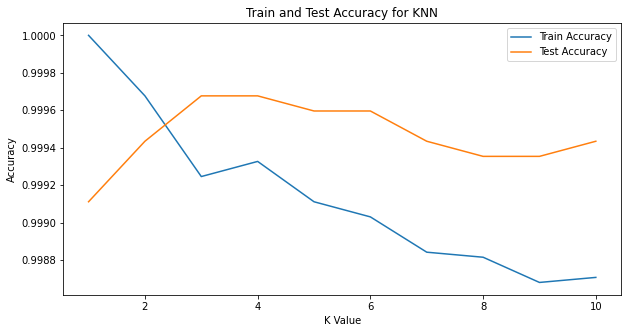

In [27]:
# Visualize the results of step 10, including the train and test accuracies.
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), train_accuracies, label='Train Accuracy')
plt.plot(range(1, 11), test_accuracies, label='Test Accuracy')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy for KNN')
plt.legend()
plt.show()